In [4]:
import boto3

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sagemaker import get_execution_role

role = get_execution_role()

s3 = boto3.client("s3")
resource = boto3.resource("s3")

s3bucket="hartreedataexplorers"
geo_file = "Land-use/kenya_geographical_features.csv"

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


# Loading and Exploring The Data

In [19]:
geo_features_loc = "s3://{}/{}".format(s3bucket, geo_file) # Reading in the geofeatures data from S3
geo_features = pd.read_csv(geo_features_loc)
geo_features.head()

,Unnamed: 0,ADM1_EN,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county
0,0,Baringo,5,1,0.044076,0.267541,0.000187,140,8
1,1,Bomet,0,1,0.148059,0.002819,0.000127,23,11
2,2,Bungoma,1,1,0.120128,0.071628,0.001635,32,10
3,3,Busia,0,0,0.000000,0.023459,0.001500,19,4
4,4,Elgeyo-Marakwet,1,0,0.195908,0.062469,0.000436,36,1


In [20]:
geo_features = geo_features.iloc[:,1:]
geo_features["ADM1_EN"] = geo_features["ADM1_EN"].str.lower()
geo_features

,ADM1_EN,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county
0,baringo,5,1,0.044076,0.267541,0.000187,140,8
1,bomet,0,1,0.148059,0.002819,0.000127,23,11
2,bungoma,1,1,0.120128,0.071628,0.001635,32,10
3,busia,0,0,0.000000,0.023459,0.001500,19,4
4,elgeyo-marakwet,1,0,0.195908,0.062469,0.000436,36,1
5,embu,1,1,0.105676,0.074651,0.000797,29,10
6,garissa,0,1,0.165852,0.298947,0.000801,96,5
7,homa bay,1,1,0.017078,0.059001,0.004580,23,8
8,isiolo,5,1,0.036181,0.276760,0.000347,235,3
9,kajiado,9,3,0.133789,0.284734,0.001160,167,8


In [23]:
geo_features.rename(columns={"ADM1_EN":"County"}, inplace=True)

In [24]:
geo_features.columns

Index(['County', 'hotel_locations', 'towns_in_county', 'Percent_trees',
       'Percent_shrub', 'Percent_urban', 'rivers_in_county',
       'roads_in_county'],
      dtype='object')

In [25]:
geo_features 

,County,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county
0,baringo,5,1,0.044076,0.267541,0.000187,140,8
1,bomet,0,1,0.148059,0.002819,0.000127,23,11
2,bungoma,1,1,0.120128,0.071628,0.001635,32,10
3,busia,0,0,0.000000,0.023459,0.001500,19,4
4,elgeyo-marakwet,1,0,0.195908,0.062469,0.000436,36,1
5,embu,1,1,0.105676,0.074651,0.000797,29,10
6,garissa,0,1,0.165852,0.298947,0.000801,96,5
7,homa bay,1,1,0.017078,0.059001,0.004580,23,8
8,isiolo,5,1,0.036181,0.276760,0.000347,235,3
9,kajiado,9,3,0.133789,0.284734,0.001160,167,8


In [26]:
gdp_food_household_merge = pd.read_csv("gdp_food_household_merge_v2.csv") # Reading in dataframe without geofeatures
gdp_food_household_merge

,Rank,County,GDP in 0KSh. millions/=,GDP in US dollar millions (PPP),Former province,Area (km2),Population (2019 Census),Capital,admin2,category,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,1.0,nairobi,1492323.0,27798.0,Nairobi,694.9,4397073.0,Nairobi,Nairobi,cereals and tubers,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,2.0,nakuru,517462.0,10333.0,Rift Valley,7509.5,2162202.0,Nakuru[8][9],Nakuru,cereals and tubers,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,3.0,kiambu,421918.0,8425.0,Central,2449.2,2417735.0,Kiambu,NaN,NaN,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,4.0,mombasa,332122.0,6632.0,Coast,212.5,1208333.0,Mombasa,Mombasa,cereals and tubers,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,5.0,nyandarua,245203.0,4896.0,Central,3107.7,638289.0,Ol Kalou,NaN,NaN,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,6.0,machakos,232860.0,4650.0,Eastern,5952.9,1421932.0,Machakos,NaN,NaN,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,7.0,meru,229646.0,4585.0,Eastern,7003.1,1545714.0,Meru,NaN,NaN,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,8.0,kisumu,194489.0,3883.0,Nyanza,2009.5,1155574.0,Kisumu,Kisumu,cereals and tubers,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,9.0,bungoma,183509.0,3664.0,Western,2206.9,1670570.0,Bungoma,NaN,NaN,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,10.0,kakamega,182563.0,3645.0,Western,3033.8,1867579.0,Kakamega,NaN,NaN,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [28]:
gdp_food_household_geo_merge = geo_features.merge(gdp_food_household_merge, left_on='County', right_on='County', how='right')
gdp_food_household_geo_merge # merging both dataframes by County

,County,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county,Rank,GDP in 0KSh. millions/=,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,1.0,1.0,0.268004,0.252397,0.243705,7.0,8.0,1.0,1492323.0,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,8.0,4.0,0.038993,0.056162,0.003039,36.0,24.0,2.0,517462.0,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,1.0,1.0,0.120034,0.115989,0.018661,23.0,12.0,3.0,421918.0,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,0.0,1.0,0.112710,0.026204,0.113001,4.0,3.0,4.0,332122.0,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,1.0,0.0,0.121343,0.038516,0.000755,19.0,4.0,5.0,245203.0,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,0.0,1.0,0.013195,0.057392,0.003830,37.0,18.0,6.0,232860.0,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,6.0,1.0,0.106703,0.099744,0.001043,67.0,11.0,7.0,229646.0,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2.0,1.0,0.001078,0.003286,0.026750,21.0,17.0,8.0,194489.0,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,1.0,1.0,0.120128,0.071628,0.001635,32.0,10.0,9.0,183509.0,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,1.0,1.0,0.057303,0.000000,0.001035,40.0,13.0,10.0,182563.0,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [29]:
gdp_food_household_geo_merge["County"].isnull().sum()

0

In [30]:
gdp_food_household_geo_merge.columns

Index(['County', 'hotel_locations', 'towns_in_county', 'Percent_trees',
       'Percent_shrub', 'Percent_urban', 'rivers_in_county', 'roads_in_county',
       'Rank', 'GDP in 0KSh. millions/=', 'GDP in US dollar millions (PPP)',
       'Former province', 'Area (km2)', 'Population (2019 Census)', 'Capital',
       'admin2', 'category', 'usdprice', 'county', 'num_households',
       'total_inhabitants', 'avg_household_size', 'avg_household_per_dwelling',
       'pct_own_dwelling', 'avg_rooms_occupied', 'percent_grid_connect',
       'percent_any_elect', 'percent_bank_account', 'percent_mobile_money',
       'total_percent_batteries', 'total_percent_solar',
       'total_percent_generator', 'grid_generator_pct', 'grid_battery_pct',
       'grid_solar_pct', 'avg_electricity_use_grid',
       'avg_typical_hours_elect_grid', 'avg_worst_hours_elect_grid',
       'not_grid_generator_pct', 'not_grid_battery_pct', 'not_grid_solar_pct',
       'avg_distance_to_connect', 'GDP percapita in US dolla

In [32]:
len(gdp_food_household_geo_merge.columns)

43

In [34]:
geo_features.columns.to_list()

['County',
 'hotel_locations',
 'towns_in_county',
 'Percent_trees',
 'Percent_shrub',
 'Percent_urban',
 'rivers_in_county',
 'roads_in_county']

In [35]:
cols_to_drop = ['Rank', 'GDP in 0KSh. millions/=', 'GDP in US dollar millions (PPP)', 'admin2', 'Former province', 'Capital', 'category', 'usdprice', 'county',
                'total_inhabitants', 'num_households']
print(len(cols_to_drop))

11


In [36]:
cols_to_keep = []
for j in gdp_food_household_geo_merge.columns:
    if j not in cols_to_drop:
        cols_to_keep.append(j)
cols_to_keep

['County',
 'hotel_locations',
 'towns_in_county',
 'Percent_trees',
 'Percent_shrub',
 'Percent_urban',
 'rivers_in_county',
 'roads_in_county',
 'Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'avg_rooms_occupied',
 'percent_grid_connect',
 'percent_any_elect',
 'percent_bank_account',
 'percent_mobile_money',
 'total_percent_batteries',
 'total_percent_solar',
 'total_percent_generator',
 'grid_generator_pct',
 'grid_battery_pct',
 'grid_solar_pct',
 'avg_electricity_use_grid',
 'avg_typical_hours_elect_grid',
 'avg_worst_hours_elect_grid',
 'not_grid_generator_pct',
 'not_grid_battery_pct',
 'not_grid_solar_pct',
 'avg_distance_to_connect',
 'GDP percapita in US dollar (PPP)']

In [37]:
len(cols_to_keep)

32

In [38]:
new_gdp_food_household_geo_merge = gdp_food_household_geo_merge[cols_to_keep]
new_gdp_food_household_geo_merge

,County,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county,Area (km2),Population (2019 Census),...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,1.0,1.0,0.268004,0.252397,0.243705,7.0,8.0,694.9,4397073.0,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,8.0,4.0,0.038993,0.056162,0.003039,36.0,24.0,7509.5,2162202.0,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,1.0,1.0,0.120034,0.115989,0.018661,23.0,12.0,2449.2,2417735.0,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,0.0,1.0,0.112710,0.026204,0.113001,4.0,3.0,212.5,1208333.0,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,1.0,0.0,0.121343,0.038516,0.000755,19.0,4.0,3107.7,638289.0,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,0.0,1.0,0.013195,0.057392,0.003830,37.0,18.0,5952.9,1421932.0,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,6.0,1.0,0.106703,0.099744,0.001043,67.0,11.0,7003.1,1545714.0,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2.0,1.0,0.001078,0.003286,0.026750,21.0,17.0,2009.5,1155574.0,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,1.0,1.0,0.120128,0.071628,0.001635,32.0,10.0,2206.9,1670570.0,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,1.0,1.0,0.057303,0.000000,0.001035,40.0,13.0,3033.8,1867579.0,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [40]:
new_gdp_food_household_geo_merge = new_gdp_food_household_geo_merge.iloc[:-1]
new_gdp_food_household_geo_merge

,County,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county,Area (km2),Population (2019 Census),...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,1.0,1.0,0.268004,0.252397,0.243705,7.0,8.0,694.9,4397073.0,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,8.0,4.0,0.038993,0.056162,0.003039,36.0,24.0,7509.5,2162202.0,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,1.0,1.0,0.120034,0.115989,0.018661,23.0,12.0,2449.2,2417735.0,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,0.0,1.0,0.112710,0.026204,0.113001,4.0,3.0,212.5,1208333.0,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,1.0,0.0,0.121343,0.038516,0.000755,19.0,4.0,3107.7,638289.0,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,0.0,1.0,0.013195,0.057392,0.003830,37.0,18.0,5952.9,1421932.0,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,6.0,1.0,0.106703,0.099744,0.001043,67.0,11.0,7003.1,1545714.0,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2.0,1.0,0.001078,0.003286,0.026750,21.0,17.0,2009.5,1155574.0,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,1.0,1.0,0.120128,0.071628,0.001635,32.0,10.0,2206.9,1670570.0,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,1.0,1.0,0.057303,0.000000,0.001035,40.0,13.0,3033.8,1867579.0,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [42]:
cols = new_gdp_food_household_geo_merge.columns.to_list()[1:]
cols

['hotel_locations',
 'towns_in_county',
 'Percent_trees',
 'Percent_shrub',
 'Percent_urban',
 'rivers_in_county',
 'roads_in_county',
 'Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'avg_rooms_occupied',
 'percent_grid_connect',
 'percent_any_elect',
 'percent_bank_account',
 'percent_mobile_money',
 'total_percent_batteries',
 'total_percent_solar',
 'total_percent_generator',
 'grid_generator_pct',
 'grid_battery_pct',
 'grid_solar_pct',
 'avg_electricity_use_grid',
 'avg_typical_hours_elect_grid',
 'avg_worst_hours_elect_grid',
 'not_grid_generator_pct',
 'not_grid_battery_pct',
 'not_grid_solar_pct',
 'avg_distance_to_connect',
 'GDP percapita in US dollar (PPP)']

# Imputing the NaNs with median values for each column

In [43]:
new_gdp_food_household_geo_merge[cols] = new_gdp_food_household_geo_merge[cols].fillna(new_gdp_food_household_geo_merge[cols].median())
new_gdp_food_household_geo_merge

/tmp/ipykernel_2427/4126133856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_gdp_food_household_geo_merge[cols] = new_gdp_food_household_geo_merge[cols].fillna(new_gdp_food_household_geo_merge[cols].median())


,County,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county,Area (km2),Population (2019 Census),...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,1.0,1.0,0.268004,0.252397,0.243705,7.0,8.0,694.9,4397073.0,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,8.0,4.0,0.038993,0.056162,0.003039,36.0,24.0,7509.5,2162202.0,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,1.0,1.0,0.120034,0.115989,0.018661,23.0,12.0,2449.2,2417735.0,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,0.0,1.0,0.112710,0.026204,0.113001,4.0,3.0,212.5,1208333.0,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,1.0,0.0,0.121343,0.038516,0.000755,19.0,4.0,3107.7,638289.0,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,0.0,1.0,0.013195,0.057392,0.003830,37.0,18.0,5952.9,1421932.0,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,6.0,1.0,0.106703,0.099744,0.001043,67.0,11.0,7003.1,1545714.0,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2.0,1.0,0.001078,0.003286,0.026750,21.0,17.0,2009.5,1155574.0,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,1.0,1.0,0.120128,0.071628,0.001635,32.0,10.0,2206.9,1670570.0,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,1.0,1.0,0.057303,0.000000,0.001035,40.0,13.0,3033.8,1867579.0,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [44]:
new_gdp_food_household_geo_merge.describe()

,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county,Area (km2),Population (2019 Census),avg_household_size,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2.106383,1.127660,0.096376,0.141651,0.009818,74.797872,8.489362,12581.825532,1.024304e+06,4.260292,...,0.006647,0.173051,68.471621,4.912683,9.155354,0.007148,0.068169,0.391174,130.716916,2854.702343
std,2.875943,0.824015,0.090333,0.145733,0.038693,82.253166,5.249730,19483.246315,6.968190e+05,0.819303,...,0.029465,0.175475,25.330732,4.849230,4.657509,0.013894,0.108178,0.197137,153.470377,1517.630510
min,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,212.500000,1.439200e+05,2.888885,...,0.000000,0.000000,29.744379,0.000000,1.029731,0.000000,0.000000,0.000000,1.043333,808.109220
25%,0.000000,1.000000,0.029100,0.024831,0.000346,23.000000,5.000000,2405.100000,6.095050e+05,3.772633,...,0.000000,0.044221,48.915579,0.000000,5.852277,0.000000,0.000000,0.292621,24.504354,1920.545428
50%,1.000000,1.000000,0.082164,0.100968,0.000962,34.500000,8.000000,3107.700000,8.936810e+05,4.077363,...,0.000000,0.140319,66.173432,4.170516,8.755063,0.000000,0.030892,0.382714,77.129904,2698.397107
75%,2.000000,1.000000,0.136494,0.241639,0.003007,116.500000,11.000000,14664.900000,1.160530e+06,4.702315,...,0.000000,0.214802,83.312204,8.827398,12.064727,0.006654,0.085184,0.492228,142.114862,3381.566151
max,13.000000,4.000000,0.406054,0.684282,0.243705,368.000000,24.000000,98597.800000,4.397073e+06,6.506424,...,0.197610,0.771468,134.350324,15.288914,23.326135,0.060218,0.621010,0.985999,595.606061,7670.506620


# Checking the correlation for all features

In [46]:
import seaborn as sns
corr_matrix = new_gdp_food_household_geo_merge.corr()
corr_matrix

,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county,Area (km2),Population (2019 Census),avg_household_size,...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
hotel_locations,1.000000,0.608757,0.273473,0.446805,-0.107209,0.284473,0.244136,0.185708,0.042401,0.047153,...,0.131274,0.046061,0.095573,-0.267833,0.117885,0.259686,0.190474,0.113126,0.099427,0.018985
towns_in_county,0.608757,1.000000,0.038532,0.192850,-0.033671,0.258265,0.487784,0.245813,0.207558,-0.008714,...,0.000954,0.058636,0.118954,-0.321014,0.012431,0.148019,-0.076207,-0.132661,0.163281,-0.077920
Percent_trees,0.273473,0.038532,1.000000,0.242428,0.252274,-0.187444,-0.052779,-0.181166,0.076381,-0.102988,...,-0.061328,0.116664,0.214678,-0.037078,-0.148883,-0.104668,0.155882,0.124937,-0.100956,0.469197
Percent_shrub,0.446805,0.192850,0.242428,1.000000,0.023996,0.666801,-0.194364,0.463428,-0.061303,0.224812,...,0.092063,0.015247,0.145837,-0.612274,0.087917,0.141842,0.076445,0.034452,0.456276,-0.300678
Percent_urban,-0.107209,-0.033671,0.252274,0.023996,1.000000,-0.196616,-0.036094,-0.148444,0.704765,-0.229559,...,0.000706,-0.126800,-0.049086,0.098803,-0.072325,-0.075270,-0.131733,-0.392297,-0.013623,0.430332
rivers_in_county,0.284473,0.258265,-0.187444,0.666801,-0.196616,1.000000,-0.139925,0.819001,-0.174653,0.123452,...,-0.040370,-0.023513,0.108873,-0.602213,0.172628,0.078475,0.012843,-0.025953,0.577679,-0.514313
roads_in_county,0.244136,0.487784,-0.052779,-0.194364,-0.036094,-0.139925,1.000000,-0.180098,0.353849,-0.166213,...,-0.026003,0.118827,-0.018931,0.213214,0.131726,0.119057,0.009516,-0.039481,-0.206575,0.061151
Area (km2),0.185708,0.245813,-0.181166,0.463428,-0.148444,0.819001,-0.180098,1.000000,-0.121917,0.021259,...,-0.052931,-0.068089,0.112872,-0.505804,0.165132,-0.046832,-0.034468,-0.157436,0.736933,-0.463899
Population (2019 Census),0.042401,0.207558,0.076381,-0.061303,0.704765,-0.174653,0.353849,-0.121917,1.000000,-0.136891,...,0.047933,-0.053790,-0.172934,0.218221,0.136171,0.065207,-0.181280,-0.401959,-0.029852,0.222324
avg_household_size,0.047153,-0.008714,-0.102988,0.224812,-0.229559,0.123452,-0.166213,0.021259,-0.136891,1.000000,...,-0.042506,0.187763,-0.220490,-0.152420,-0.040218,-0.117711,-0.266513,0.010798,-0.053448,-0.224009


<AxesSubplot:>

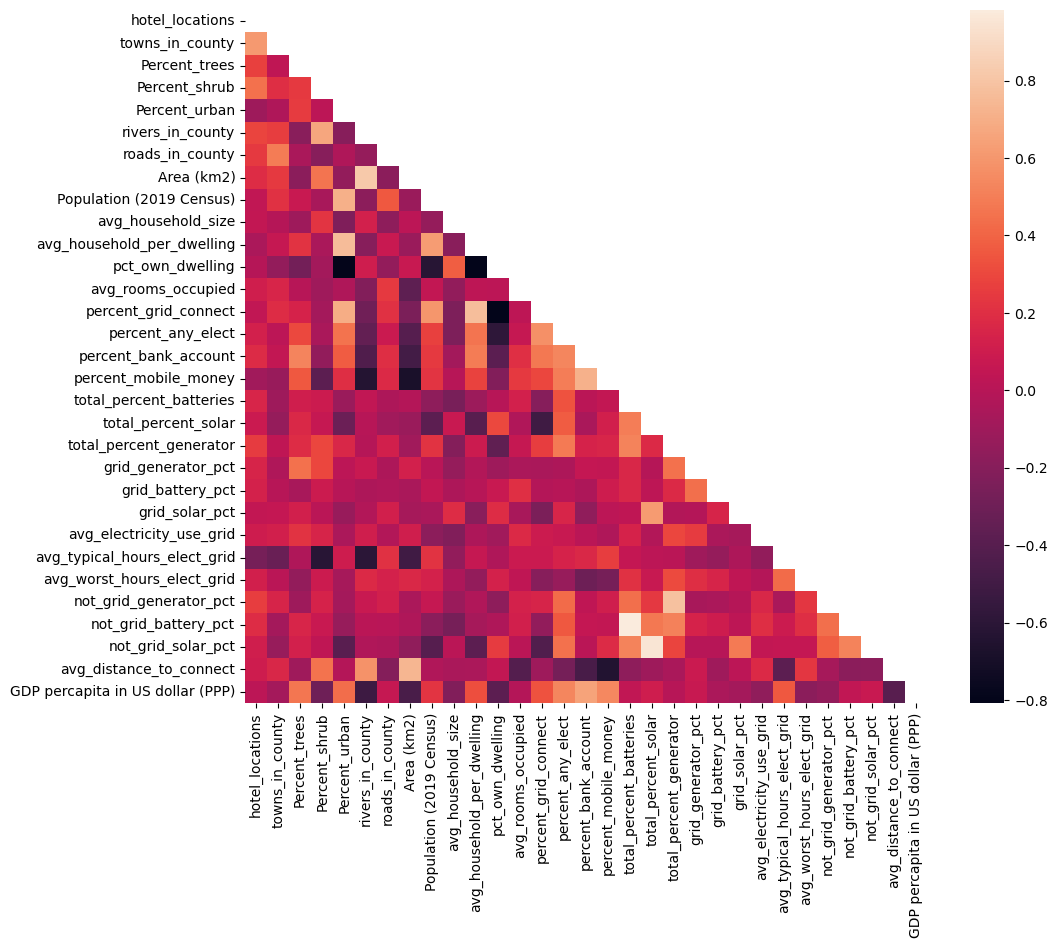

In [47]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, mask=mask)

In [48]:
corr_matrix_target = corr_matrix.iloc[:,len(corr_matrix)-1]
corr_matrix_target = pd.DataFrame(corr_matrix_target).reset_index()
corr_matrix_target = corr_matrix_target.rename(columns={"index":"variable","GDP percapita in US dollar (PPP)":"target"})
corr_matrix_target

,variable,target
0,hotel_locations,0.018985
1,towns_in_county,-0.077920
2,Percent_trees,0.469197
3,Percent_shrub,-0.300678
4,Percent_urban,0.430332
5,rivers_in_county,-0.514313
6,roads_in_county,0.061151
7,Area (km2),-0.463899
8,Population (2019 Census),0.222324
9,avg_household_size,-0.224009


In [49]:
new_corr_matrix_target = corr_matrix_target[(corr_matrix_target['target']>0.2) | (corr_matrix_target['target']<-0.2)].iloc[:-1]
new_corr_matrix_target

,variable,target
2,Percent_trees,0.469197
3,Percent_shrub,-0.300678
4,Percent_urban,0.430332
5,rivers_in_county,-0.514313
7,Area (km2),-0.463899
8,Population (2019 Census),0.222324
9,avg_household_size,-0.224009
10,avg_household_per_dwelling,0.320192
11,pct_own_dwelling,-0.375702
13,percent_grid_connect,0.333595


In [50]:
variables = new_corr_matrix_target["variable"].to_list()
variables

['Percent_trees',
 'Percent_shrub',
 'Percent_urban',
 'rivers_in_county',
 'Area (km2)',
 'Population (2019 Census)',
 'avg_household_size',
 'avg_household_per_dwelling',
 'pct_own_dwelling',
 'percent_grid_connect',
 'percent_any_elect',
 'percent_bank_account',
 'percent_mobile_money',
 'avg_typical_hours_elect_grid',
 'avg_distance_to_connect']

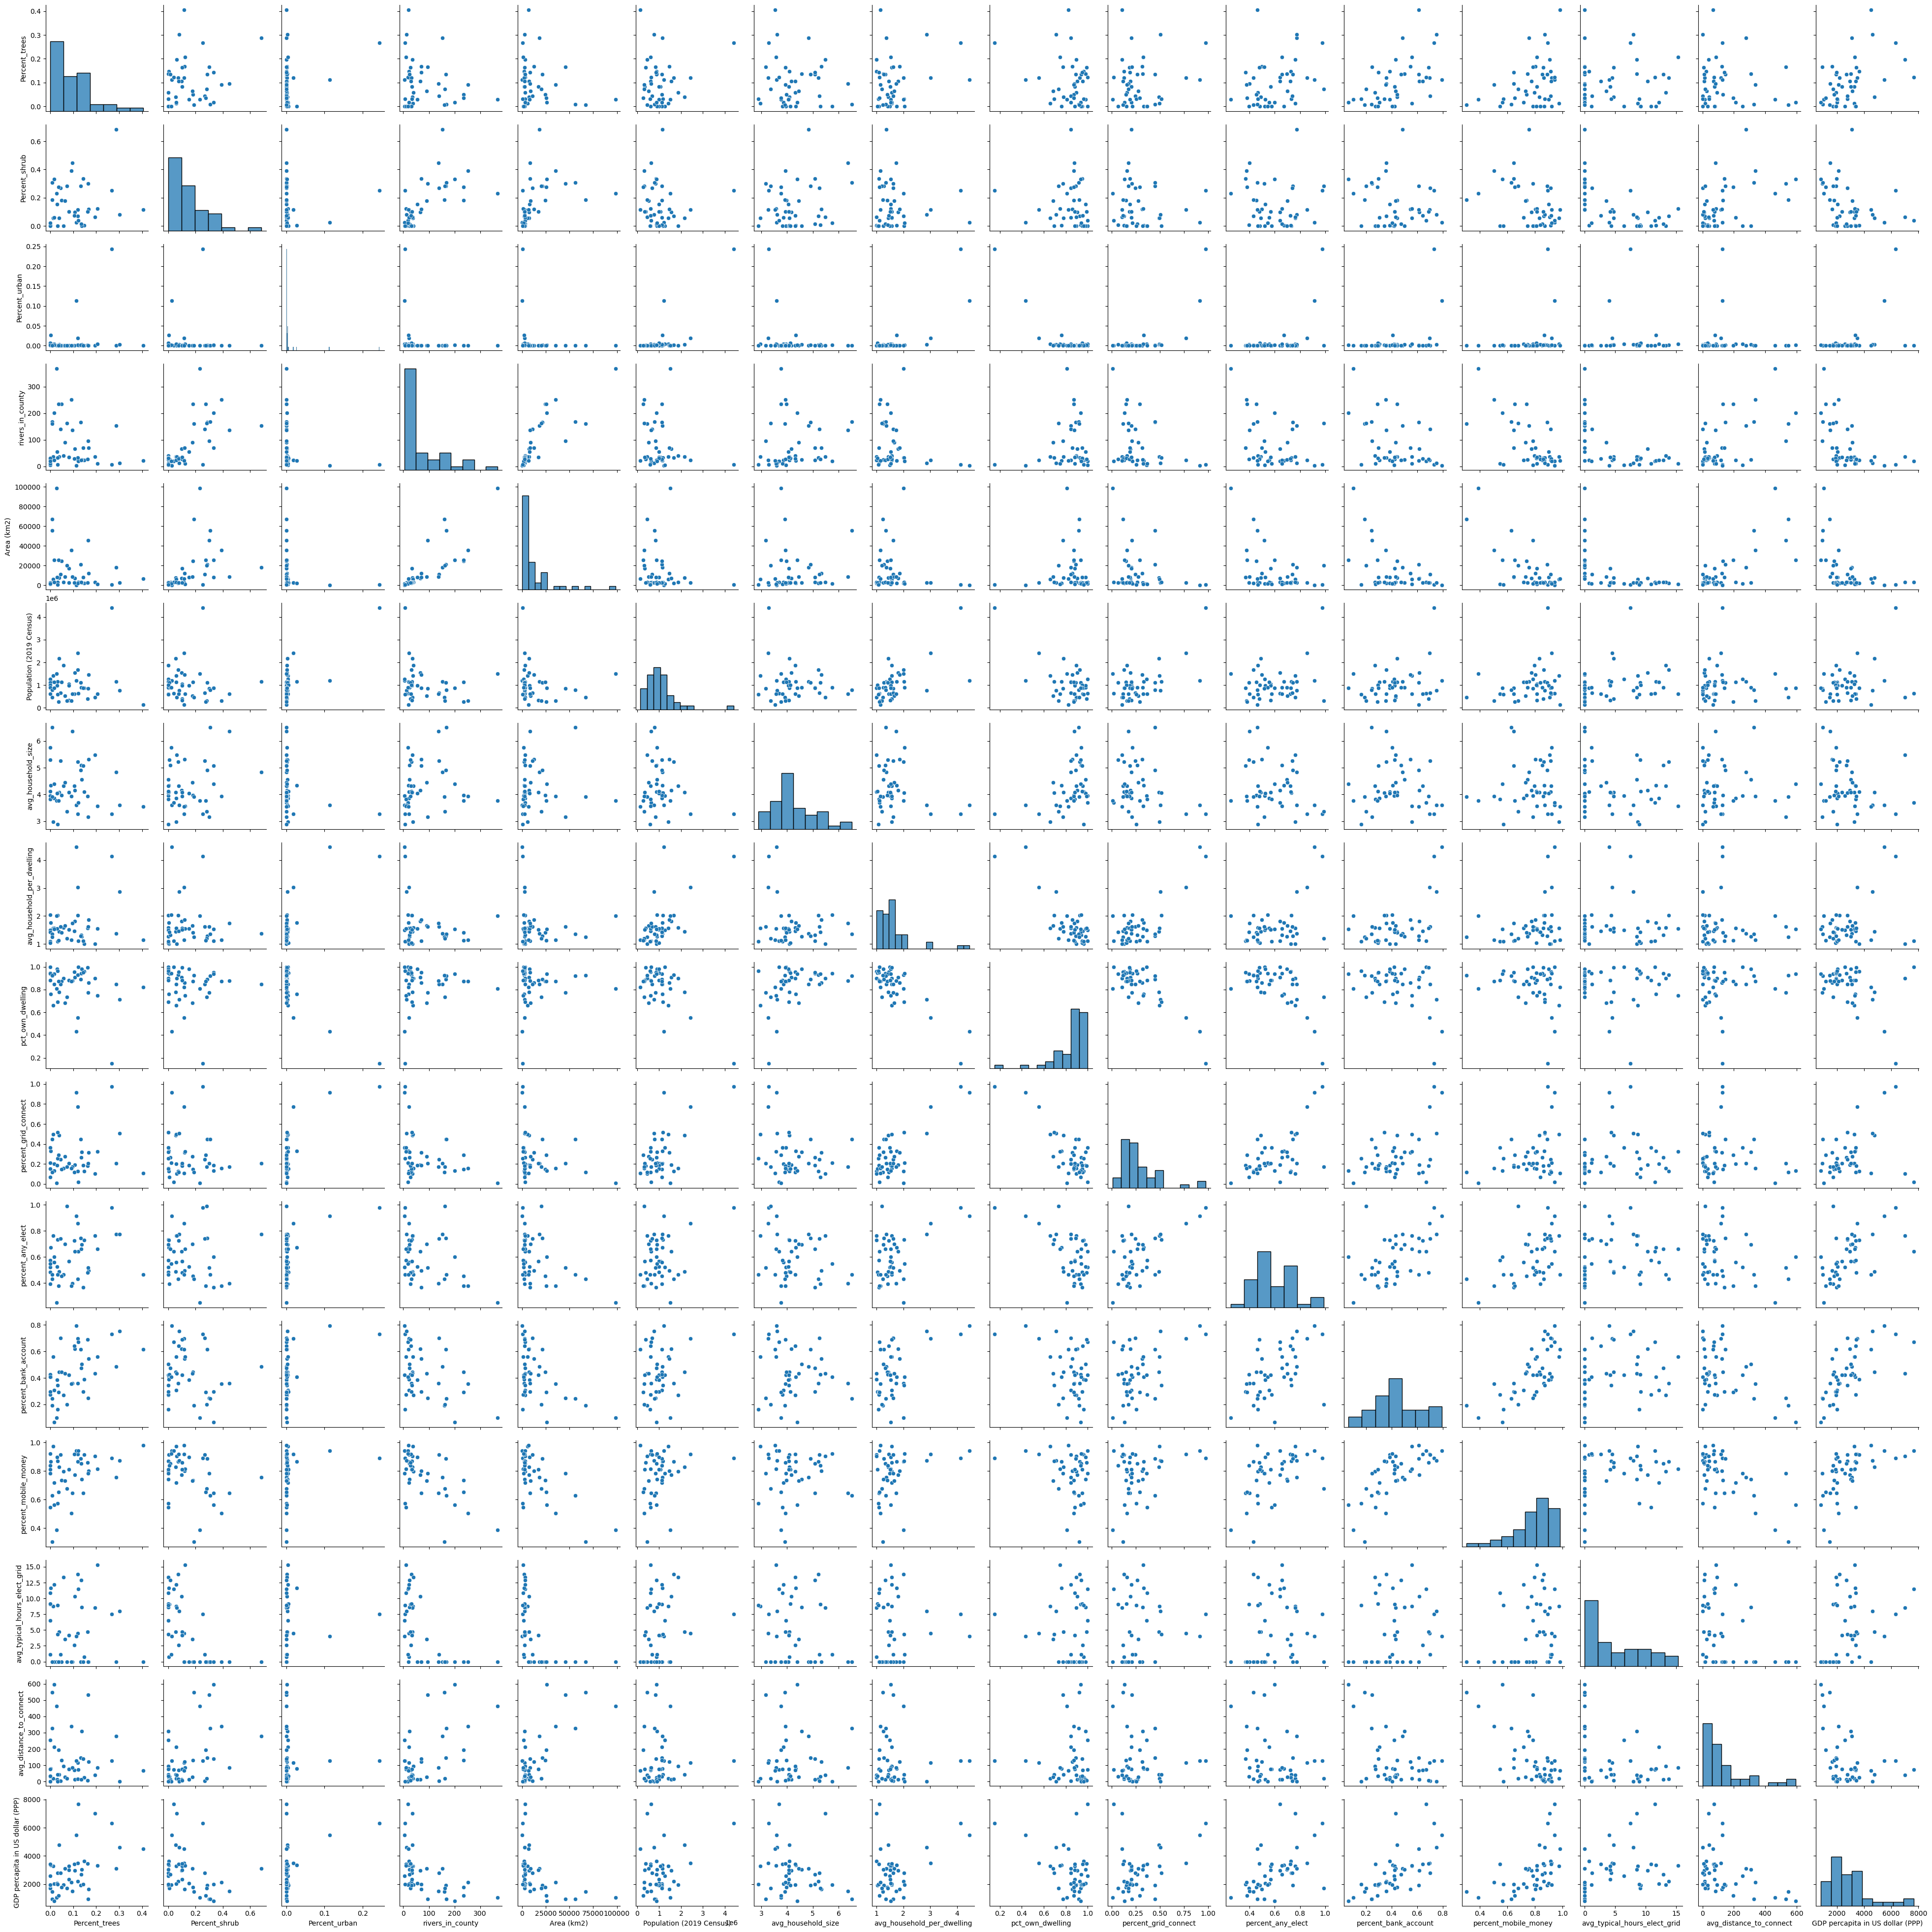

In [52]:
plot_data = new_gdp_food_household_geo_merge[variables + ['GDP percapita in US dollar (PPP)']]

sns.pairplot(plot_data)
plt.show()

In [53]:
new_gdp_food_household_geo_merge

,County,hotel_locations,towns_in_county,Percent_trees,Percent_shrub,Percent_urban,rivers_in_county,roads_in_county,Area (km2),Population (2019 Census),...,grid_battery_pct,grid_solar_pct,avg_electricity_use_grid,avg_typical_hours_elect_grid,avg_worst_hours_elect_grid,not_grid_generator_pct,not_grid_battery_pct,not_grid_solar_pct,avg_distance_to_connect,GDP percapita in US dollar (PPP)
0,nairobi,1.0,1.0,0.268004,0.252397,0.243705,7.0,8.0,694.9,4397073.0,...,0.011513,0.097859,60.912899,7.521720,8.242618,0.000000,0.000000,0.000000,128.050729,6321.932795
1,nakuru,8.0,4.0,0.038993,0.056162,0.003039,36.0,24.0,7509.5,2162202.0,...,0.000000,0.000000,37.304289,4.715640,7.190349,0.000000,0.000000,0.000000,41.263336,4778.924448
2,kiambu,1.0,1.0,0.120034,0.115989,0.018661,23.0,12.0,2449.2,2417735.0,...,0.006359,0.092395,76.571541,4.510192,4.778392,0.018372,0.027343,0.375615,116.374842,3484.666434
3,mombasa,0.0,1.0,0.112710,0.026204,0.113001,4.0,3.0,212.5,1208333.0,...,0.000000,0.000000,62.928659,3.990792,4.278126,0.000000,0.000000,0.000000,127.550000,5488.553238
4,nyandarua,1.0,0.0,0.121343,0.038516,0.000755,19.0,4.0,3107.7,638289.0,...,0.000000,0.000000,56.325000,11.500000,12.000000,0.000000,0.210623,0.570865,72.980000,7670.506620
5,machakos,0.0,1.0,0.013195,0.057392,0.003830,37.0,18.0,5952.9,1421932.0,...,0.000000,0.056194,53.061738,8.730830,8.317618,0.042179,0.004213,0.481725,17.603868,3270.198575
6,meru,6.0,1.0,0.106703,0.099744,0.001043,67.0,11.0,7003.1,1545714.0,...,0.000000,0.029793,43.715090,10.336842,11.592562,0.008979,0.213840,0.418793,10.608683,2966.266722
7,kisumu,2.0,1.0,0.001078,0.003286,0.026750,21.0,17.0,2009.5,1155574.0,...,0.000000,0.163266,69.736693,11.673978,16.342454,0.020105,0.047468,0.465816,79.408140,3360.234827
8,bungoma,1.0,1.0,0.120128,0.071628,0.001635,32.0,10.0,2206.9,1670570.0,...,0.000000,0.192905,41.483431,13.806565,13.865024,0.000000,0.059532,0.318408,14.242899,2193.263377
9,kakamega,1.0,1.0,0.057303,0.000000,0.001035,40.0,13.0,3033.8,1867579.0,...,0.009178,0.265065,50.243125,13.312374,14.517568,0.000000,0.084398,0.328245,92.813103,1951.724666


In [54]:
new_gdp_food_household_geo_merge.to_csv("new_gdp_food_household_merge_no_county3.csv",index=False) # saving the file